# Explore Weather Trends
In this project, you will analyze local and global temperature data and compare the temperature trends where you live to overall global temperature trends.

## Extracting data from database

* select * from global_data;
* Select year,avg_temp from city_data where city='Ranchi' AND country='India';
* Select year,avg_temp from city_data where city='Delhi' AND country='India';

## Collecting Data :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df_ranchi=pd.read_csv('ranchi_use.csv')
df_globaldata=pd.read_csv('global_data.csv')
df_delhi=pd.read_csv('delhi.csv')

### Exploring City Data

In [3]:
df_ranchi.head(1)

,year,avg_temp
0,1796,24.01


In [4]:
df_ranchi.tail(1)

,year,avg_temp
217,2013,25.98


The above two operations conclude that city data is given for the years 1849-2013.

In [5]:
df_ranchi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      218 non-null    int64  
 1   avg_temp  211 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


### Checking Global Data

In [6]:
df_globaldata.head(1)

,year,avg_temp
0,1750,8.72


In [7]:
df_globaldata.tail(1)

,year,avg_temp
265,2015,9.83


The above two operations conclude that global data is given for the years 1750-2015.

In [8]:
df_globaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [9]:
#For better comparison the global and local dataframes should lie within same period of obseravtion.
#Creating a new dataframe for this:
df_global=df_globaldata.query('year > 1848 & year < 2014')

# Calculating Rolling mean (or Moving average) 
### And handling missing data:
(with a window size of 10 years for better visualisation of data)

In [10]:
#setting window size
size=10
#calculating rolling mean
df_global["movingtemp"] = df_globaldata["avg_temp"].rolling(window = size).mean()

#### Handling missing data for Ranchi:

In [11]:
mean_ranchi= df_ranchi.avg_temp.mean()
mean_ranchi

24.17175355450237

In [12]:
df_ranchi.avg_temp.fillna(mean_ranchi,inplace=True)

In [13]:
#setting the window size
size=10
#calculate the rolling mean
df_ranchi['movingtemp']=df_ranchi['avg_temp'].rolling(window=size).mean()
#resetting the index of Ranchi dataframe for accurate results:
df_ranchi.reset_index(inplace = True, drop = True)

In [14]:
df_ranchi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        218 non-null    int64  
 1   avg_temp    218 non-null    float64
 2   movingtemp  209 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 5.2 KB


#### Handling missing data for Delhi:

In [15]:
mean_delhi= df_delhi.avg_temp.mean()
mean_delhi

25.16626865671642

In [16]:
df_delhi.avg_temp.fillna(mean_delhi,inplace=True)

In [17]:
#setting the window size
size=10
#calculate the rolling mean
df_delhi['movingtemp']=df_delhi['avg_temp'].rolling(window=size).mean()
#resetting the index of Delhi dataframe for accurate results:
df_delhi.reset_index(inplace = True, drop = True)

In [18]:
df_delhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        218 non-null    int64  
 1   avg_temp    218 non-null    float64
 2   movingtemp  209 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 5.2 KB


# Plotting Line Graph

### Comparing local and global trend:

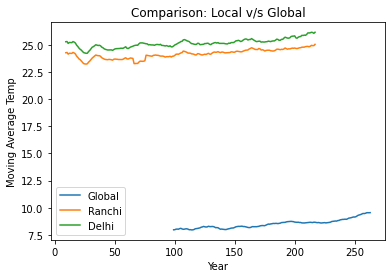

In [19]:
plt.plot(df_global.movingtemp,label="Global")
plt.plot(df_ranchi.movingtemp,label="Ranchi")
plt.plot(df_delhi.movingtemp,label="Delhi")
# Set the x axis label of the current axis.
plt.xlabel('Year')
# Set the y axis label of the current axis.
plt.ylabel('Moving Average Temp')
# Set a title of the current axes.
plt.title('Comparison: Local v/s Global')
plt.legend()

### Plotting temperature difference:

In [20]:
df_ranchi['diff_G']=df_ranchi['avg_temp']-df_global['avg_temp']
df_delhi['diff_G']=df_delhi['avg_temp']-df_global['avg_temp']
df_delhi['diff_R']=df_delhi['avg_temp']-df_ranchi['avg_temp']

#### Plotting Local-Global temperature difference:

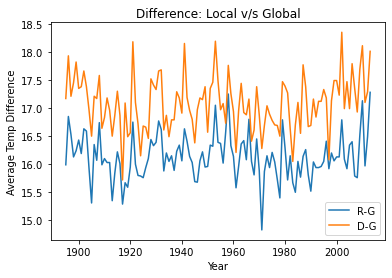

In [21]:
plt.plot(df_ranchi.year,df_ranchi['diff_G'],label='R-G')
plt.plot(df_delhi.year,df_delhi['diff_G'],label='D-G')
# Set the x axis label of the current axis.
plt.xlabel('Year')
# Set the y axis label of the current axis.
plt.ylabel('Average Temp Difference')
# Set a title of the current axes.
plt.title('Difference: Local v/s Global')
plt.legend()

#### Plotting local-local temperature difference:

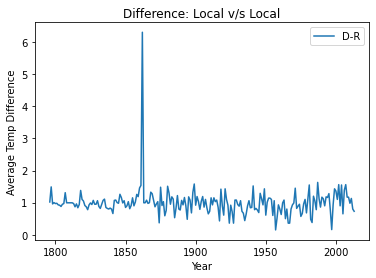

In [22]:
plt.plot(df_delhi.year,df_delhi['diff_R'],label='D-R')
# Set the x axis label of the current axis.
plt.xlabel('Year')
# Set the y axis label of the current axis.
plt.ylabel('Average Temp Difference')
# Set a title of the current axes.
plt.title('Difference: Local v/s Local')
plt.legend()

### Calculating correlation coefficient:

##### Global vs Ranchi:

In [23]:
df_global['avg_temp'].corr(df_ranchi['avg_temp']) 

0.3810337379721006

##### Global vs Delhi:

In [24]:
df_global['avg_temp'].corr(df_delhi['avg_temp']) 

0.36352144051290736

##### Ranchi vs Delhi:

In [25]:
df_ranchi['avg_temp'].corr(df_delhi['avg_temp']) 

0.7281892619502837

## Observations:
* The average temperature for Global and local have shown a linear increase in the observed years.
* The moving average temperature for Ranchi and Delhi is much greater than Global.
* Delhi and Ranchi show very similar trend for moving average temperature
* The average temperature difference for :
    Ranchi and Global is around 17 degrees.
    Delhi and Global is around 16 degrees.
    Ranchi and Delhi is around 1 degree.
* The correalation coeffiecient for global vs local (Ranchi and Delhi) is around 0.37
    and for Delhi vs Ranchi is around 0.73